<a href="https://colab.research.google.com/github/DarkMagicianK/MLpracticos2022/blob/main/Tp2/Tp2_ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1.1 - Casos covid
---
En https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv
y https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv
están datasets de la situación epidemiológica y sanitaria relacionada con el covid en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).
Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.

a) Hay variables que puedan ser razonablemente consideradas normales?

b) Hay variables que tienen un comportamiento sospechoso?

In [1]:
# Librerias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import data_table
import seaborn as sns
sns.set_theme(style="darkgrid")
from scipy.stats import norm

# Funciones extras
def ajuste_norm(data,ax):
    mu, std = norm.fit(data);
    xmin,xmax = ax.get_xlim();
    x = np.linspace(xmin, xmax, 50);
    p = norm.pdf(x, mu, std);
    ax.plot(x, p, 'k', linewidth=2)

# Seteo de variables
url_file = 'https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv'
url_file = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
data_covid = pd.read_csv(url_file)
namecols = data_covid.columns

data_table.enable_dataframe_formatter()
data_covid
#data_table.disable_dataframe_formatter()


,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


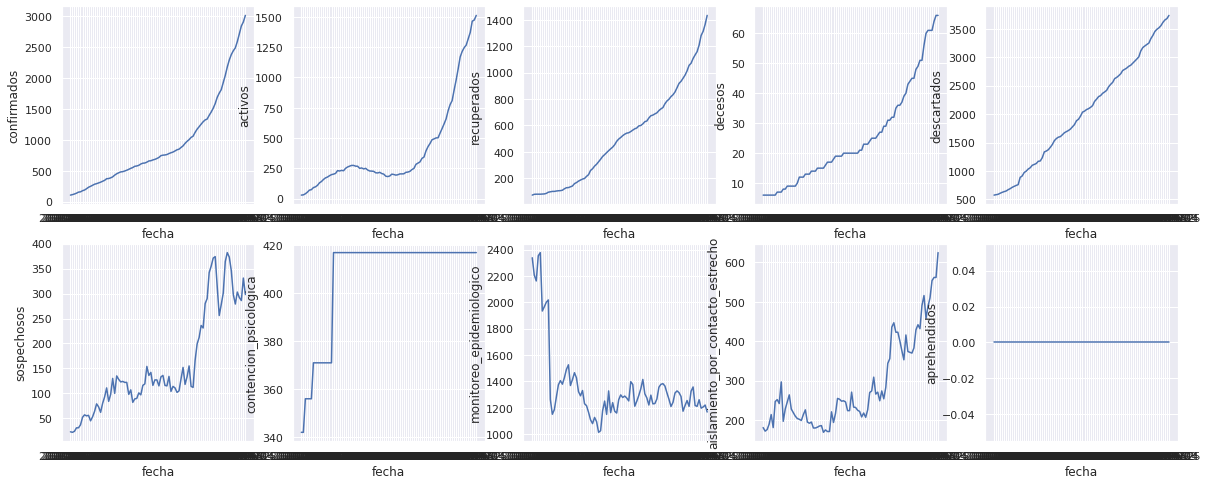

In [2]:
# Plots de cols respecto al tiempo
#sns.pairplot(data_covid,diag_kind="kde")

_, ax1 = plt.subplots(2,5, figsize = ( 20, 8));
ax_row = -1;
for i in range(10):
  if (i%5 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_covid, ax=ax1[ax_row][i%5])

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


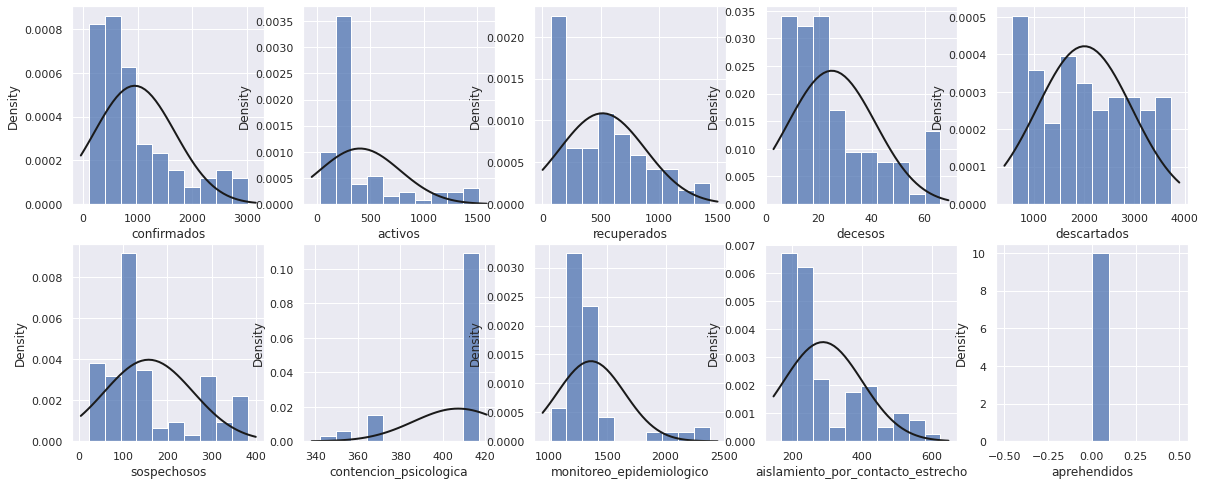

In [3]:
# Histogramas de cols
_, ax2 = plt.subplots(2,5, figsize = ( 20, 8))
ax_row = -1;
for i in range(10):
  if (i%5 ==0): ax_row = ax_row +1
  sns.histplot(x=namecols[i+1],data=data_covid, bins=10, stat='density', ax=ax2[ax_row][i%5])

  # Ajute normal
ax_row = -1;
for i in range(10):
  if (i%5 ==0): ax_row = ax_row +1
  ajuste_norm(data_covid[namecols[i+1]],ax2[ax_row][i%5])  

# Conclusiones
---
a) Según los plots e histogramas obtenidos, ninguna variable presenta indicios de una distribución normal.
Podria decirse que la variable, *descartados* presenta una tendencia a una distribucion uniforme.

b)
Comportamiento sospechoso: La variable,

** contencion_psicologica*: presenta dos cluster definidos. Puede deberse a la saturación del equipo de trabajo.

** monitoreo_epidemiologico*: presenta dos cluster definidos tambien. En epoca de crecemiento de casos de covid, puede que la baja a la mitad practicamente se deba a una politica ministerial. En uno de los clusters se exhibe un comportamiento gausiano.


# Ejercicio N 1.2 - Camas covid
---

In [4]:
# Librerias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import data_table
import seaborn as sns
sns.set_theme(style="darkgrid")
from scipy.stats import norm

#Funcionex extras
def ajuste_norm(data,ax):
    mu, std = norm.fit(data);
    xmin,xmax = ax.get_xlim();
    x = np.linspace(xmin, xmax, 50);
    p = norm.pdf(x, mu, std);
    ax.plot(x, p, 'k', linewidth=2)

#------------------------------------------
# Eliminación de outlier basic
def lier_out_basic(datain,cols):
  dataout = datain
  cols = cols[1:-1]
  #print("Variables -> ",cols)#,'\n', "Cantidad -> ", cols.shape)

  for col in range(cols.size):
    dato = dataout[cols[col]]
    for i in range(dato.size)[1:-1]:
      if dato[i] < 4:
        #dato[i] = np.mean([dato[i-1],dato[i+1]])
        dato[i] = (dato[i-1] + dato[i+1])/2
    dataout[cols[col]] = dato
  return dataout

#------------------------------------------
# eliminación de outlier "no parametrica"
  # Funciones extras
def lier_out_np(dataf2,cols):
  umbral = 3 # en cantidad de desvio
  cols = cols[1:-1]
  for col in range(cols.size):
    dato = dataf2[cols[col]]
    q3 = dato.quantile(0.75);
    q1 = dato.quantile(0.25);
    desvio = dato.std();

    for i in range(dato.size)[1:-1]:
      if (dato[i] < q1-umbral*desvio) or (dato[i] > q3+umbral*desvio):
        dato[i] = (dato[i-1] + dato[i+1])/2

    dataf2[cols[col]] = dato
  return dataf2

# Seteo de variables
url_file_camas = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv';
data_camas = pd.read_csv(url_file_camas);
namecols = data_camas.columns;

# Eliminación de un atributo
del data_camas[namecols[0]];
namecols = data_camas.columns;
orden = data_camas.shape;
nro_cols = orden[1];

data_table.enable_dataframe_formatter()
data_camas

,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


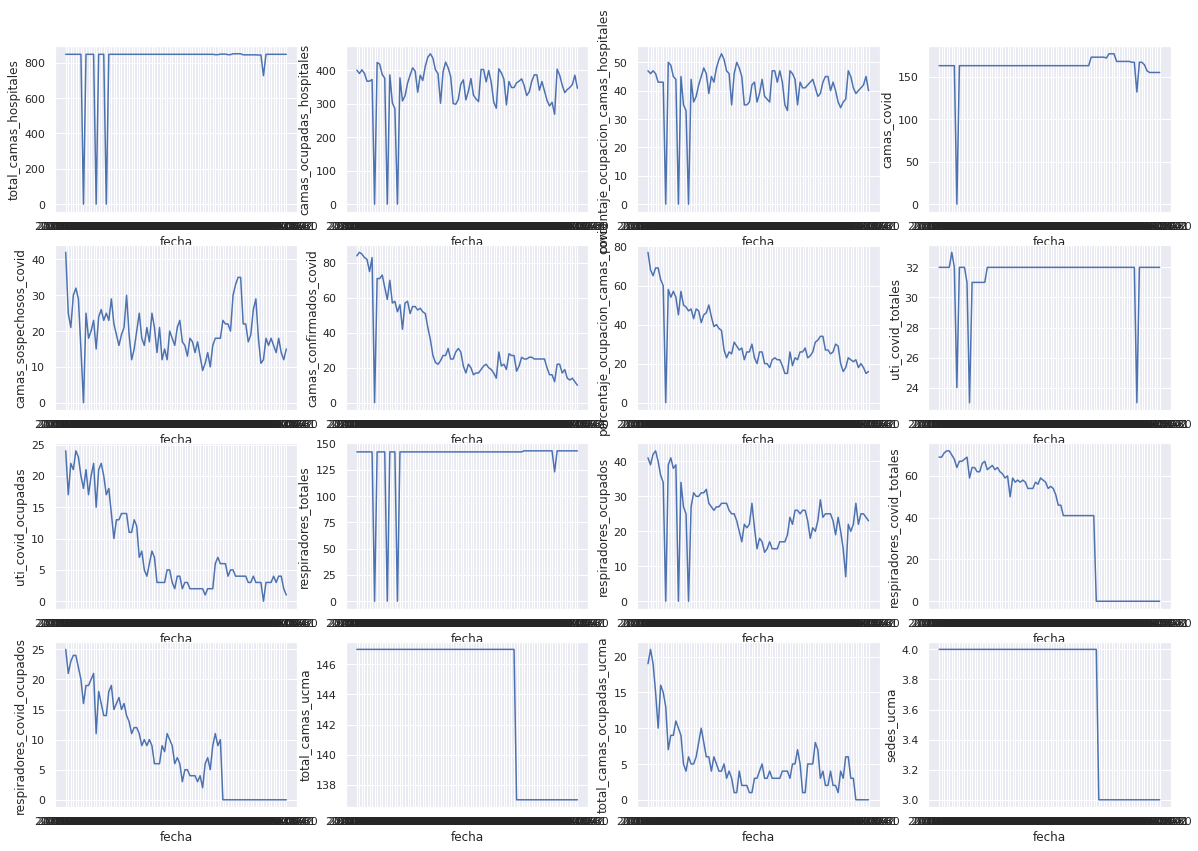

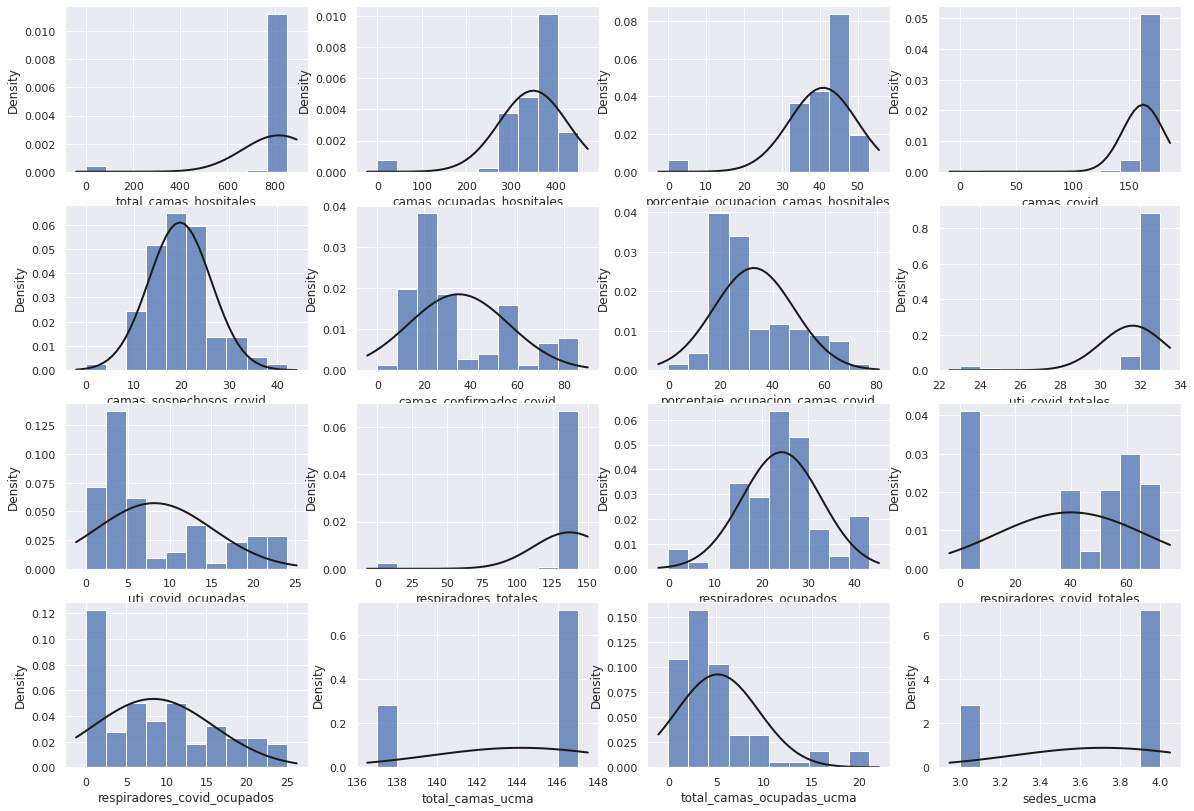

In [5]:

#sns.pairplot(data_camas,diag_kind="kde")
# Plots de cols respecto al tiempo
_, ax1 = plt.subplots(4,4, figsize = ( 20, 14));
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_camas, ax=ax1[ax_row][i%4])

# Histogramas de cols
_, ax2 = plt.subplots(4,4, figsize = ( 20, 14))
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.histplot(x=namecols[i+1],data=data_camas, bins=10,stat='density', ax=ax2[ax_row][i%4])  

# Ajute normal
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  ajuste_norm(data_camas[namecols[i+1]],ax2[ax_row][i%4])  

#sns.pairplot(data_camas,diag_kind="kde")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


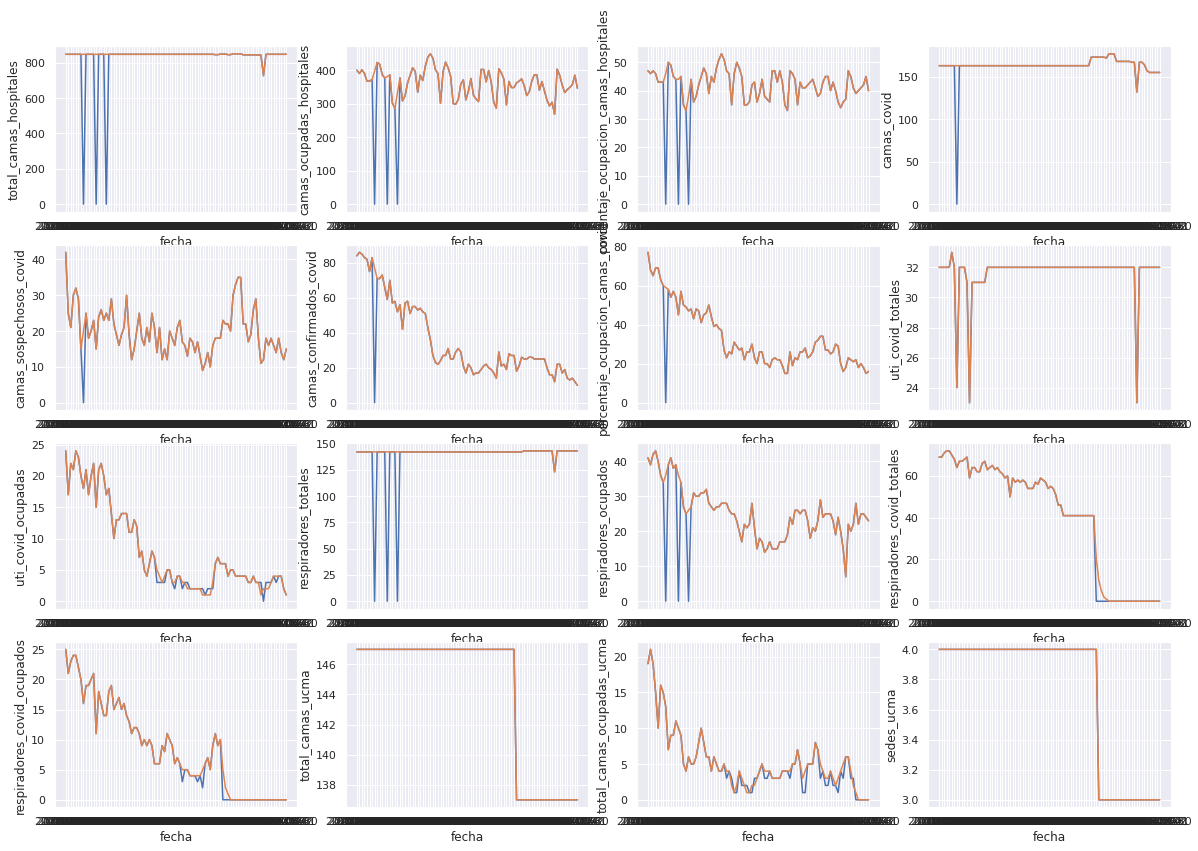

In [6]:
from pandas.core.indexes.base import default_index
# Plots de cols respecto al tiempo de datos raw y eliminación de outliers basic
_, ax1 = plt.subplots(4,4, figsize = ( 20, 14));
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_camas, ax=ax1[ax_row][i%4])

data_camas_out = lier_out_basic(data_camas,namecols)
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_camas_out, ax=ax1[ax_row][i%4])


# Para consultar:
Al llamar a la funcion `df_out = lier_out_basic(df_in)` o `df_out = lier_out_np(df_in)`, no pude encontrar porque al salir de la función el resultado de `df_out` terminaba pisando al de `df_in`. 

Por ej, al hacer,
```
data_camas_out = lier_out_basic(data_camas,namecols)
sns.lineplot(x="fecha", y=namecols[1],data=data_camas, ax=ax1[0])
sns.lineplot(x="fecha", y=namecols[1],data=data_camas_out, ax=ax1[1])

```

el grafico obtenido en ambos subplots es el mismo. Revise varias vaces las funciones que escribi `df_out = lier_out_basic(df_in)` y `df_out = lier_out_np(df_in)` ... pero no encontré el error.

Para darle una solucion provisoria termine haciendo,
```
sns.lineplot(x="fecha", y=namecols[1],data=data_camas, ax=ax1[0])
data_camas_out = lier_out_basic(data_camas,namecols)
sns.lineplot(x="fecha", y=namecols[1],data=data_camas_out, ax=ax1[1])
```



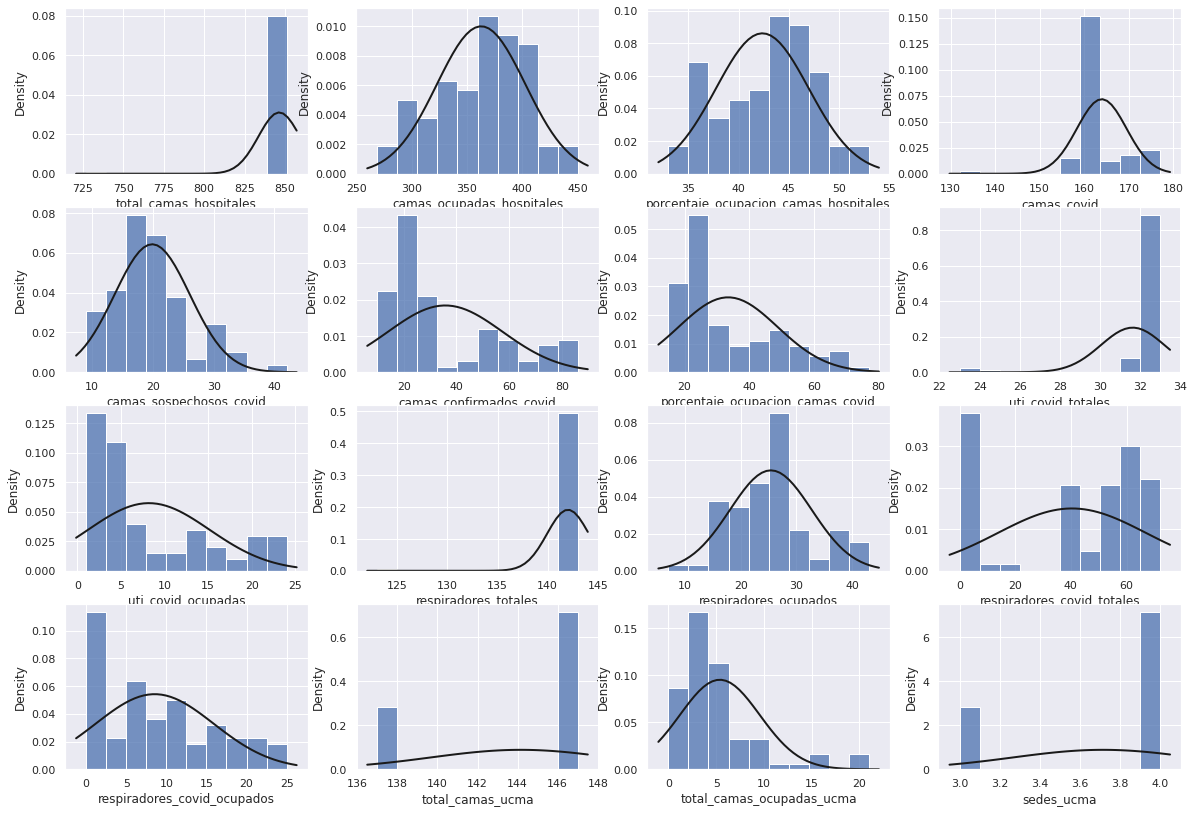

In [7]:
# Histogramas de cols
_, ax2 = plt.subplots(4,4, figsize = ( 20, 14))
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.histplot(x=namecols[i+1],data=data_camas_out, bins=10,stat='density', ax=ax2[ax_row][i%4])  

# Ajute normal
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  ajuste_norm(data_camas_out[namecols[i+1]],ax2[ax_row][i%4])  

# Conclusiones
---
a) Según los histogramas obtenidos, 'camas_ocupadas_hospitales'(1,2),'camas_sospechosos_covid'(2,1) y 'porcentaje_ocupacion_camas_hospitales'(1,3), presentan a priori una distribución normal.
Después de realizar una sencilla eliminación de outliers, la hipótesis anterior parece consolidarse, agregándose también la variable 'respiradores_ocupados'(3,3) como candidata a presentar distribución normal.

b) Podría decirse que las variables, 'total_camas_hospitales('(1,1), 'camas_covid('(1,4), 'uti_covid_totales'(2,4), 'respiradores_totales'(3,2),  'total_camas_ocupadas_ucma'(4,2), 'sedes_ucma'(4,4) presentan un comportamiento sospechoso. Es muy posible que este se deba ar la saturación del sistema de salud.


